# Stable Diffusion Experiment

##### If you do not have an NVIDIA GPU [or AMD], make sure to login to hugging face using `huggingface-cli login` in your terminal.

In [1]:
from prompttools.experiment import StableDiffusionExperiment
from prompttools.utils.similarity import ssim

2023-08-19 20:29:02.659148: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 20:29:03.229767: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
compare_images_paths = [
    "examples/notebooks/image_experiments/compare_images_folder/A panda writing code in the Swiss Alps3.png",
    "examples/notebooks/image_experiments/compare_images_folder/A_fruit_basket_on_the_moon.png",
]

experiment = StableDiffusionExperiment(
    hf_model_path=["CompVis/stable-diffusion-v1-4"],
    prompt=["Just a fruit basket"],
    compare_images_folder="examples/notebooks/image_experiments/compare_images_folder/",
    use_auth_token=True,
    **{"image_folder": ["stablediffusion_images/"]}
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

,response,latency,ssim_score
0,,392.736734,0.233222

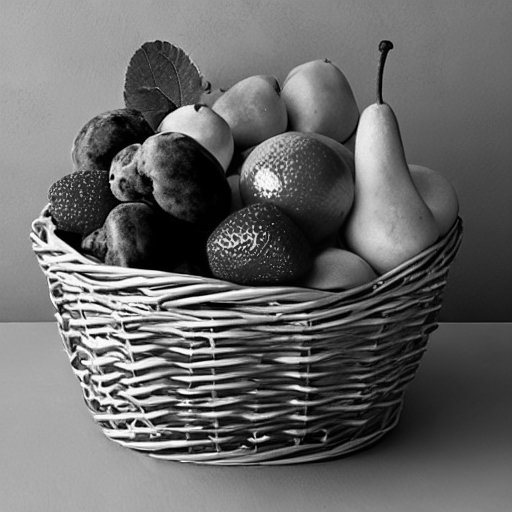

In [3]:
experiment.run()

experiment.evaluate(
    "ssim_score",
    ssim,
    expected=compare_images_paths,
    image_experiment=True
)

experiment.visualize()